In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.corpus import stopwords
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackng310/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jackng310/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
whisky = pd.read_csv('whisky_advocate.csv')

In [3]:
81.061 + (1.525 * math.log(24))


whisky['expected_rating'] = [round(81.061 + (1.525 * math.log(whisky['price'].iloc[x])), 2) for x in range(len(whisky['price']))]



whisky.sort_values('expected_rating', ascending = False)
whisky['rating_difference'] = [whisky['rating'].iloc[x] - whisky['expected_rating'].iloc[x] for x in range(len(whisky['expected_rating']))]




whisky.sort_values('rating_difference')
whisky[whisky['rating_difference'] > 0].sort_values('rating_difference', ascending = False)

,brand,category,price,rating,review,reviewer,expected_rating,rating_difference
1717,"Sazerac Rye, 18 year old, 1983, 45%",Rye Whiskey,38.0,96,Deep amber color. Bold and surprisingly youthf...,John Hansell,86.61,9.39
1715,"Old Forester Birthday Bourbon, 1994 vintage, 47%",Bourbon/Tennessee,40.0,96,"A crisp, robust, very dynamic bourbon. Amber-o...",John Hansell,86.69,9.31
1603,Four Roses Limited Edition Small Batch (2013 R...,Bourbon/Tennessee,85.0,97,A marriage of 13 and 18 year old bourbons. A m...,John Hansell,87.84,9.16
1895,Evan Williams Single Barrel 2000 Vintage (Barr...,Bourbon/Tennessee,26.0,95,"Very elegant, bright, and silky smooth, with h...",John Hansell,86.03,8.97
1719,"Thomas H. Handy, 66.35%",Rye Whiskey,55.0,96,Just what the category was missing -- a stella...,John Hansell,87.17,8.83
...,...,...,...,...,...,...,...,...
725,"BenRiach 22 year old Moscatel Wood Finish, 46%",Single Malt Scotch,180.0,89,This limited edition bottling is non-chill fil...,Gavin Smith,88.98,0.02
775,Wemyss Malts The Rockpool 1995 vintage (distil...,Single Malt Scotch,180.0,89,A very solid and sound Bowmore with saline not...,Dave Broom,88.98,0.02
563,Douglas Laing Queen of the Hebrides (distilled...,Single Malt Scotch,181.0,89,The first expression in Douglas Laing’s new Ol...,Gavin Smith,88.99,0.01
905,Teeling Vintage Reserve 29 year old Single Mal...,Irish Single Malt,2500.0,93,"Lean green fruits and dry spices, with fresh C...",Jonny McCormick,92.99,0.01


# Whisky Statistics

In [41]:
#number of results
whisky_brands = whisky.brand.unique()
print(f'{len(whisky_brands)} different bottles')
print('\n')
whisky
#averages
average_price = float(round(whisky['price'].mean(), 2))
print(f'Average price of whisky is ${average_price}')
print('\n')
average_rating = float(round(whisky['rating'].mean(), 2))
print(f'Average rating of whisky is {average_rating}')
print('\n')

#max and min
min_price = min(whisky['price'])
min_price_brand = whisky['brand'][whisky['price'] == min_price].iloc[0]
print(f'The cheapest bottle of whisky is {min_price_brand} at ${min_price}0')
print('\n')
max_price = max(whisky['price'])
max_price_brand = whisky['brand'][whisky['price'] == max_price].iloc[0]
print(f'The most expensive bottle of whisky is {max_price_brand} at ${max_price}0')
print('\n')
max_rating = max(whisky['rating'])
max_brand = whisky['brand'][whisky['rating'] == max_rating]
max_rating_brands = [whisky['brand'][whisky['rating'] == max_rating].iloc[x] for x in range(len(max_brand))]
print(f'The highest rated bottle(s) of whisky are {max_rating_brands[0]}, {max_rating_brands[1]}, {max_rating_brands[2]}, {max_rating_brands[3]} and {max_rating_brands[4]} each with a score of {max_rating}')
print('\n')
min_rating = min(whisky['rating'])
min_brand = whisky['brand'][whisky['rating'] == min_rating]
min_rating_brands = [whisky['brand'][whisky['rating'] == min_rating].iloc[x] for x in range(len(min_brand))]
print(f'The lowest rated bottle(s) of whisky are {min_rating_brands[0]} and {min_rating_brands[1]} each with a score of {min_rating}')


5089 different bottles


Average price of whisky is $360.91


Average rating of whisky is 86.96


The cheapest bottle of whisky is Grand Grizzly, 40% at $7.00


The most expensive bottle of whisky is Diamond Jubilee by John Walker & Sons, 42.5% at $157000.00


The highest rated bottle(s) of whisky are Johnnie Walker Blue Label, 40%, Four Roses Limited Edition Small Batch (2013 Release), 51.5%, Bowmore 46 year old (distilled 1964), 42.9%, Parker's Heritage Collection, 'Golden Anniversary', 50% and Black Bowmore 42 year old 1964 vintage, 40.5% each with a score of 97


The lowest rated bottle(s) of whisky are Woodford Reserve Master’s Collection Five Malt, 45.2% and Cavalry, 45% each with a score of 60


# Reviewer Stats

                        review     rating  expected_rating  rating_difference
reviewer                                                                     
David Fleming              142  88.647887        87.513028           1.134859
Adam Polonski               22  88.136364        87.369091           0.767273
Jonny McCormick            924  87.998918        87.957727           0.041190
Susannah Skiver Barton     252  87.944444        87.155873           0.788571
Gavin Smith                872  87.677752        88.781617          -1.103865
Jeffery Lindenmuth         218  87.628440        87.395963           0.232477
John Hansell              1142  87.345009        88.071086          -0.726077
Fred Minnick               189  86.835979        87.355132          -0.519153
Davin de Kergommeaux       237  86.215190        86.863460          -0.648270
Dominic Roskrow            240  86.150000        87.902792          -1.752792
Dave Broom                 506  85.974308        88.907945      

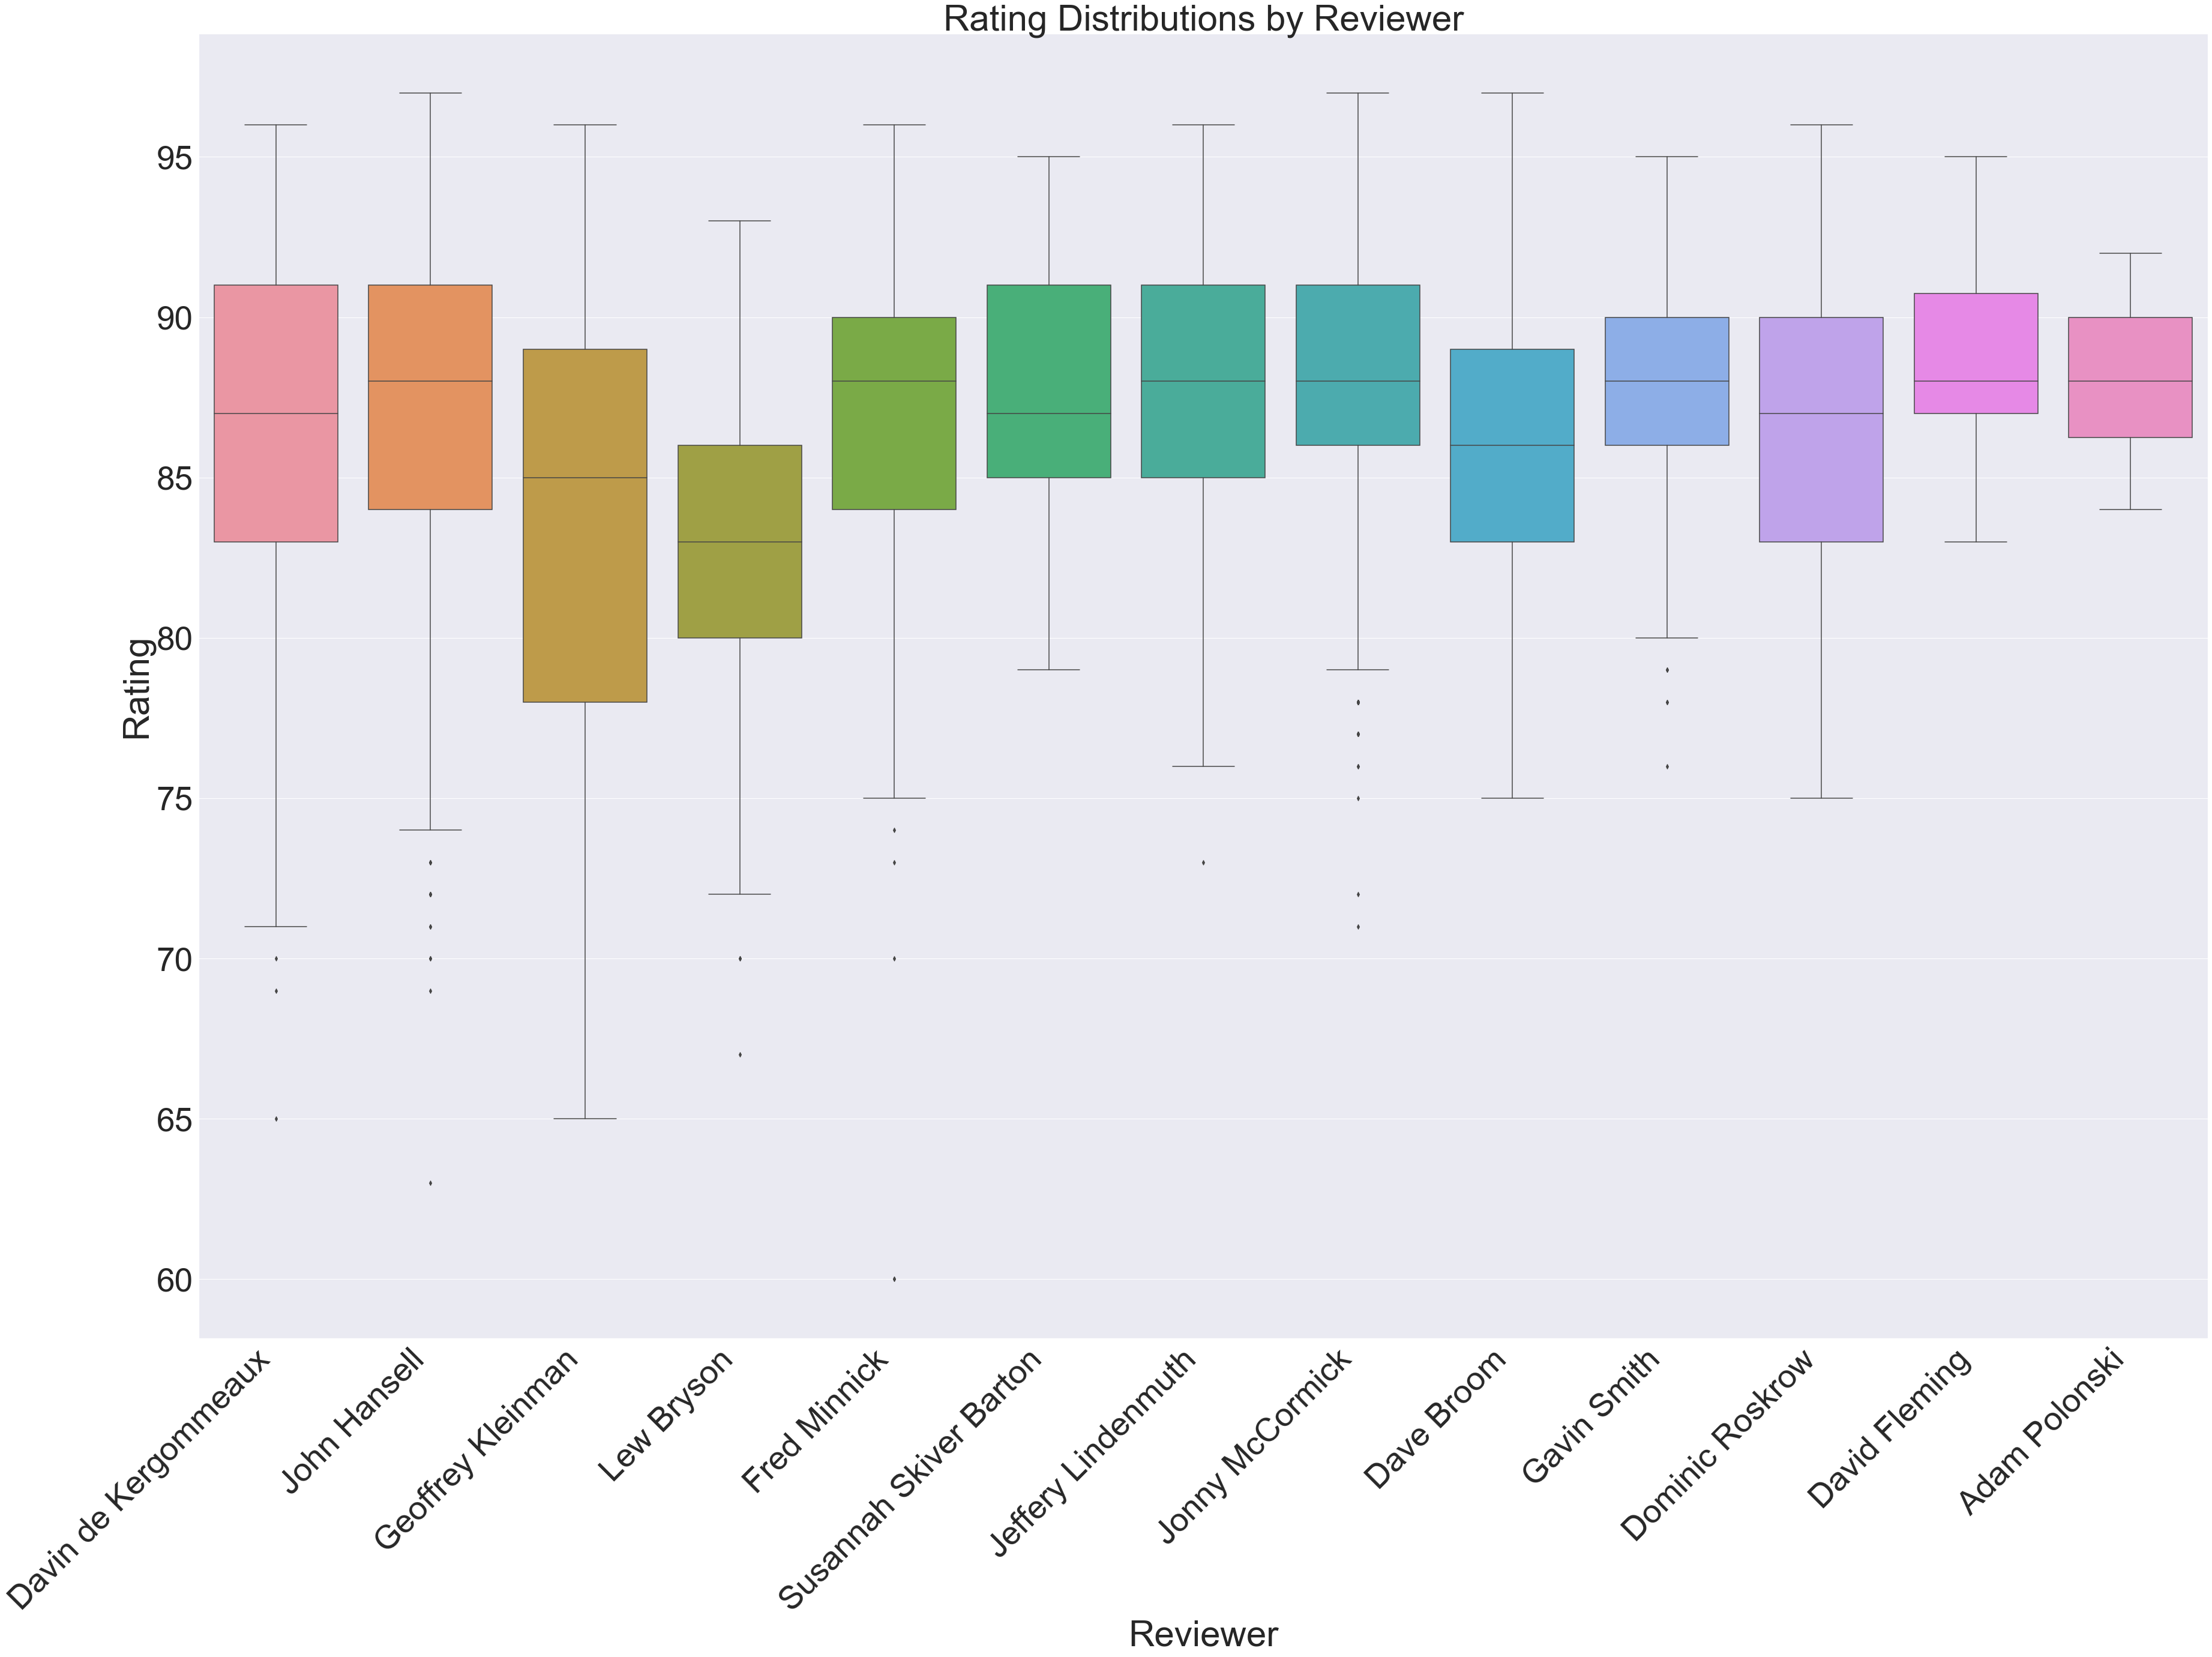

In [44]:
reviewer_ratings = whisky[['review','reviewer', 'rating', 'expected_rating', 'rating_difference']].groupby('reviewer').agg({'review': 'count','rating': 'mean', 'expected_rating': 'mean', 'rating_difference': 'mean'}).sort_values('rating', ascending = False)
whisky.reviewer.unique()
reviewer_rating = whisky[['reviewer', 'rating']]
plt.figure(figsize=(60,40))
reviewer_box = sns.boxplot(x = 'reviewer', y = 'rating', data=whisky)
reviewer_box.set_xticklabels(reviewer_box.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
reviewer_box.set_title('Rating Distributions by Reviewer')
plt.xlabel('Reviewer')
plt.ylabel('Rating')
sns.set(font_scale = 5)
print(reviewer_ratings)
print('\n')

# Category Stats

In [6]:
len(whisky.category.unique())
category_count = whisky.groupby('category').count().sort_values('rating',ascending = False)
category_group = whisky[['rating', 'category']].groupby('category').agg('mean')
category_count.agg('mean')['price']
categories = pd.merge(category_group, category_count['review'], how = 'outer', on = 'category')
categories_filter = categories[categories['review'] > 89]
categories_filter.sort_values('rating', ascending = False)
whisky_filter = pd.merge(categories_filter, whisky, how = 'inner', on = 'category')
whisky_filter.category.unique()
whisky_filter = whisky_filter.rename(columns = {'rating_x': 'avg_rating', 'review_x': 'num_reviews', 'rating_y': 'rating', 'review_y': 'review'})
whisky_filter

,category,avg_rating,num_reviews,brand,price,rating,review,reviewer,expected_rating,rating_difference
0,Blended Malt Scotch Whisky,88.078652,178,"Wemyss Vintage Malts 'The Smooth Gentleman,' 8...",40.0,79,"Indeed smooth, and malty, with vanilla, shortb...",John Hansell,86.69,-7.69
1,Blended Malt Scotch Whisky,88.078652,178,That Boutique-y Whisky Company Blended Malt #2...,144.0,78,"Caramel wafers, white pepper, pumice stone, an...",Jonny McCormick,88.64,-10.64
2,Blended Malt Scotch Whisky,88.078652,178,"Master of Malt Reference Series I, 47.5%",62.0,77,A predominantly young blended malt heads up th...,Jonny McCormick,87.35,-10.35
3,Blended Malt Scotch Whisky,88.078652,178,"MacNair’s Lum Reek Peated 12 year old, 46%",60.0,89,"Runny caramel, green melon, and vanilla, tagge...",Jonny McCormick,87.30,1.70
4,Blended Malt Scotch Whisky,88.078652,178,"Johnnie Walker Green Label, 43%",55.0,89,"Just as complex as Johnnie Walker Gold, but fu...",John Hansell,87.17,1.83
...,...,...,...,...,...,...,...,...,...,...
4356,Single Malt Scotch,87.018528,2051,Bunnahabhain Moine Dram an Stiùireadair 10 yea...,160.0,80,Stiùireadair means “helmsman” in Gaelic. This ...,Dave Broom,88.80,-8.80
4357,Single Malt Scotch,87.018528,2051,Wemyss Malts Rhubarb Royale (distilled at Benr...,102.0,80,"Here is Benrinnes in very summery guise, with ...",Dave Broom,88.11,-8.11
4358,Single Malt Scotch,87.018528,2051,"The Macallan 1841 Replica Bottling, 41.7%",190.0,80,Style: Speyside single malt scotch Color: Gold...,John Hansell,89.06,-9.06
4359,Single Malt Scotch,87.018528,2051,"Glenkinchie, 59.3%",97.0,80,Another whisky that will not disappoint fans o...,Dominic Roskrow,88.04,-8.04


                               rating  review
category                                     
Blended Malt Scotch Whisky  88.078652     178
Blended Scotch Whisky       87.709434     265
Bourbon/Tennessee           88.408647     717
Canadian                    86.277567     263
Craft Whiskey               83.758242     364
Irish                       87.898990      99
Japanese Whisky             88.128440     109
Rye Whiskey                 87.897674     215
Single Grain Scotch         86.300000     100
Single Malt Scotch          87.018528    2051




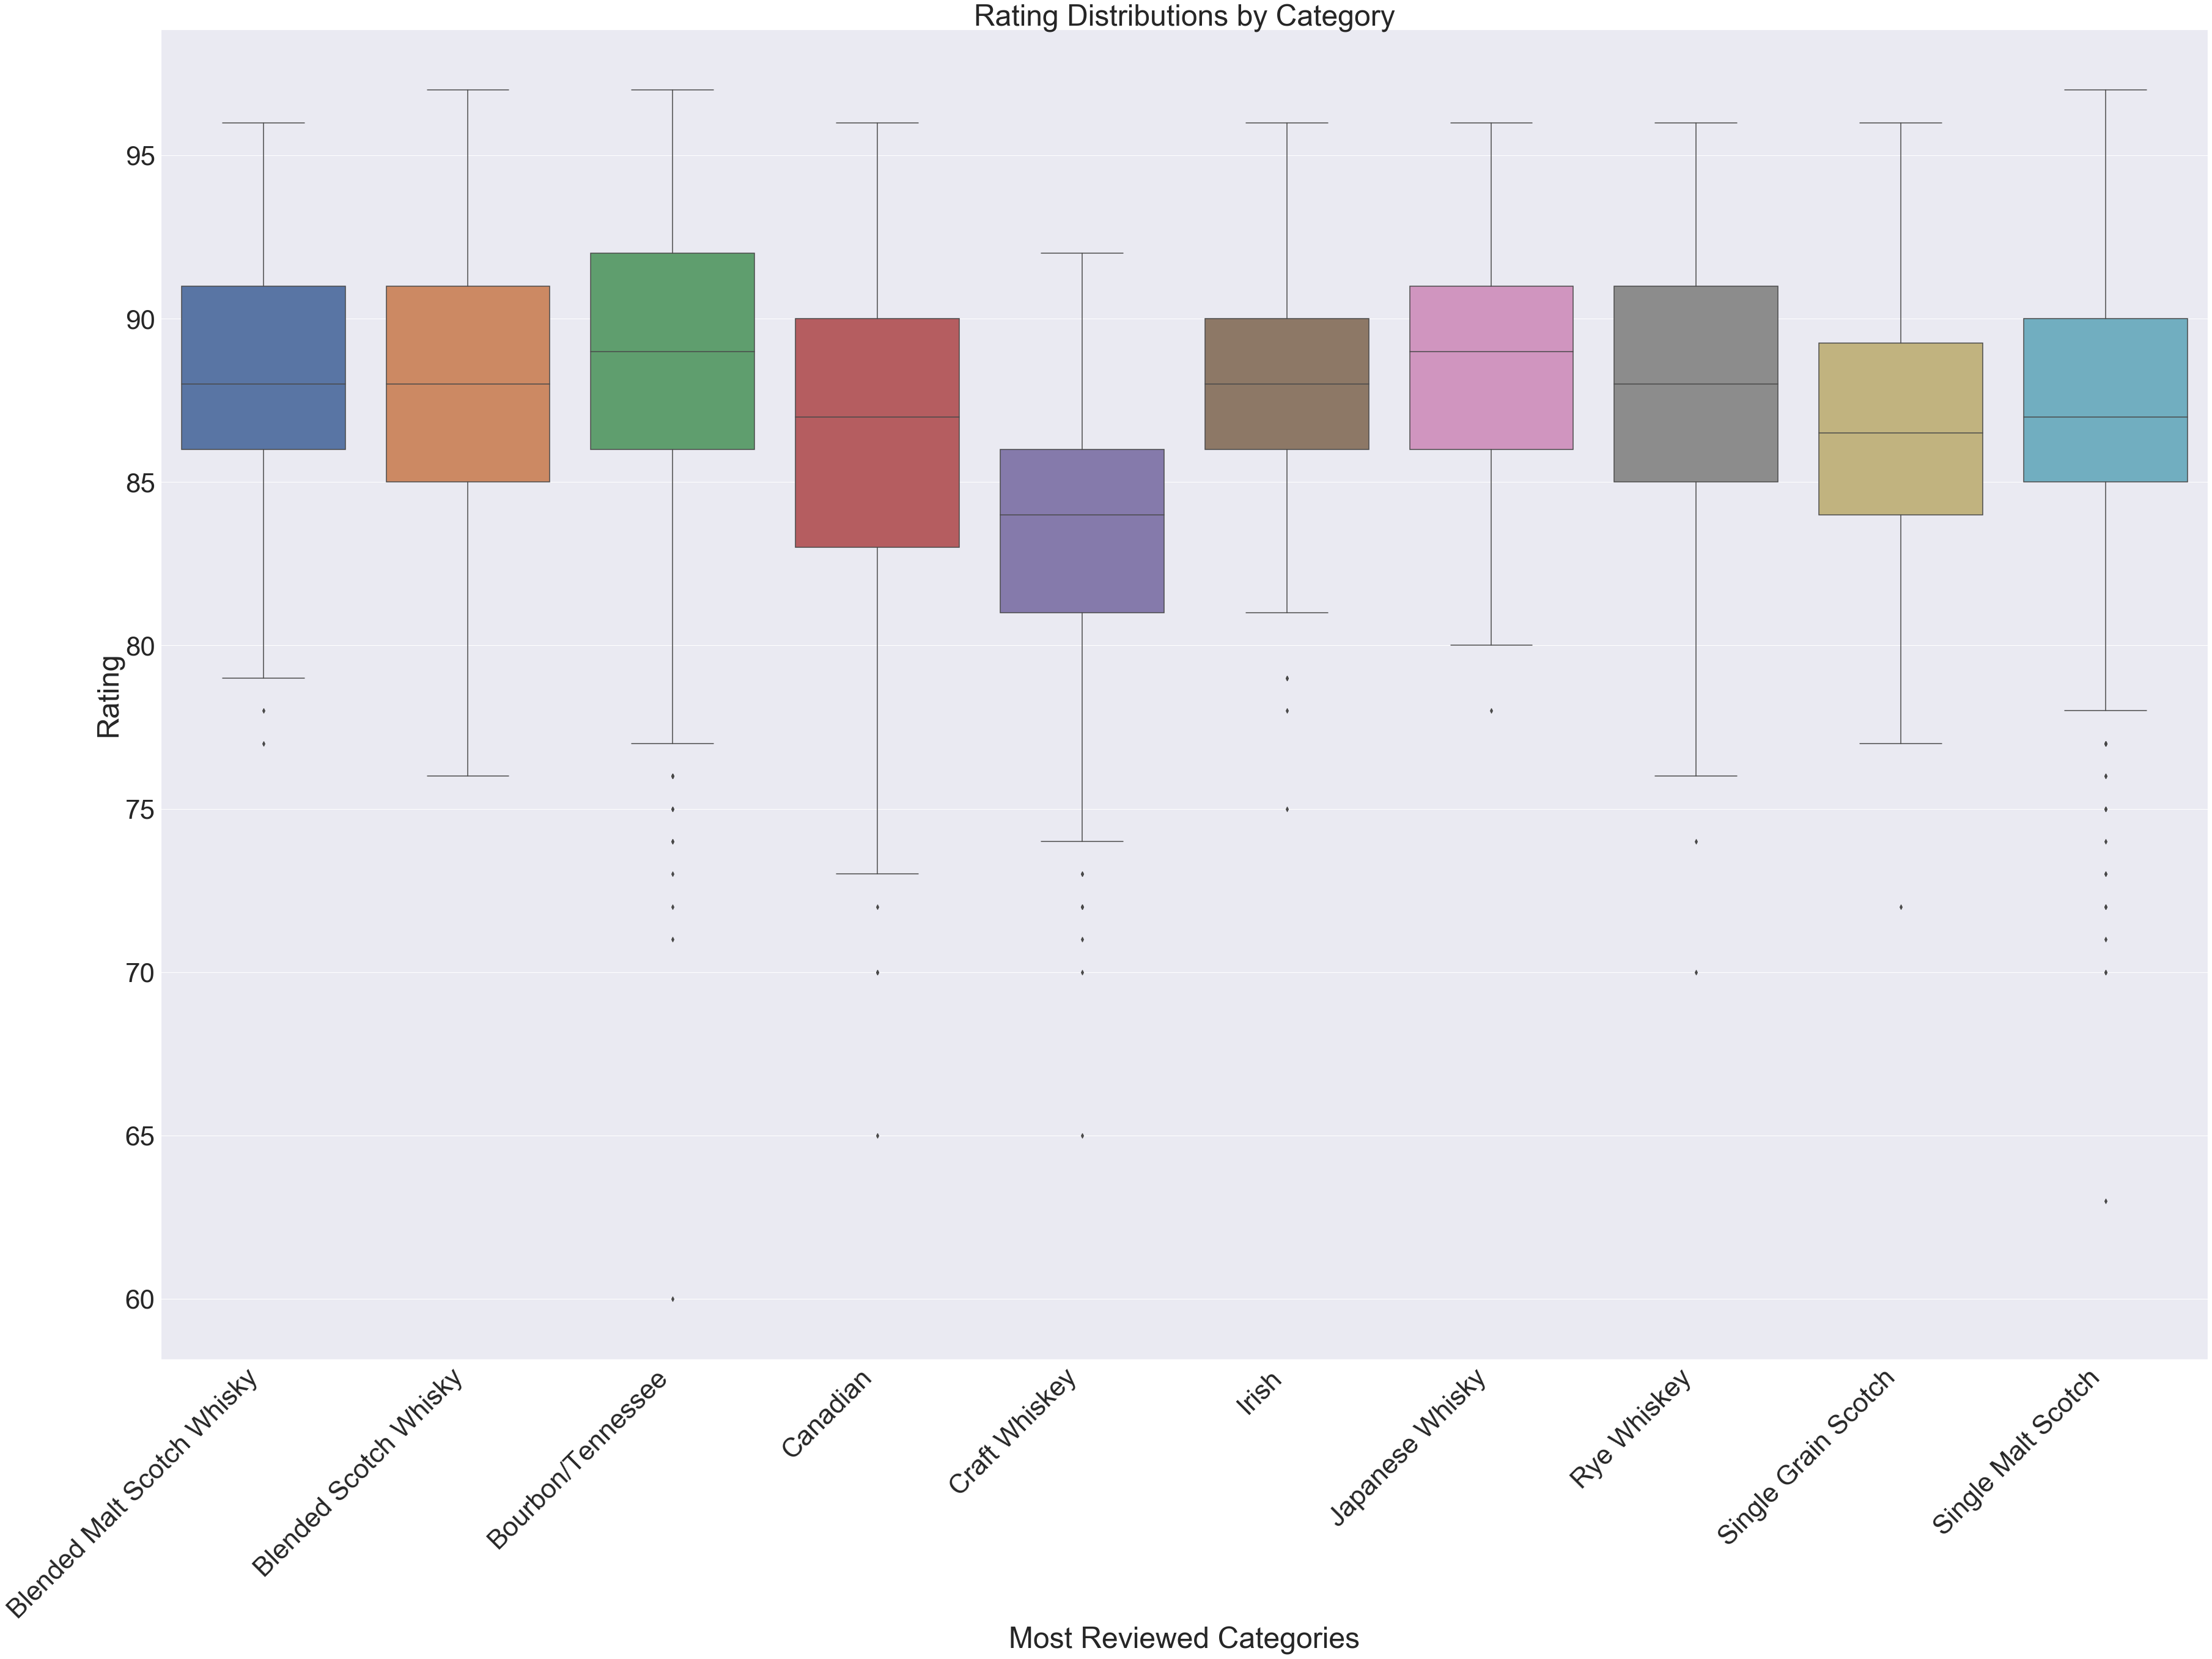

In [40]:

plt.figure(figsize=(60,40))
category_box = sns.boxplot(x = 'category', y = 'rating', data = whisky_filter)
category_box.set_xticklabels(category_box.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
category_box.set_title('Rating Distributions by Category')
plt.xlabel('Most Reviewed Categories')
plt.ylabel('Rating')
sns.set(font_scale = 5)
print(categories_filter)
print('\n')

# Price vs. Rating Correlation

In [8]:
whisky_corr = whisky.corr(method = 'pearson')['price']['rating']
print(f'The Pearson Correlation between price and rating is {round(whisky_corr, 3)}')

The Pearson Correlation between price and rating is 0.081


# Top Rated Whisky by Price

In [9]:
@interact

def sort_price(MinRating = [*range(90,98)], Sort = ['Price Low to High', 'Price High to Low']):
    
    if Sort == 'Price Low to High':
            return whisky[whisky['rating'] >= MinRating].sort_values('price').head(10)
    if Sort == 'Price High to Low':
            return whisky[whisky['rating'] >= MinRating].sort_values('price', ascending = False).head(10)


interactive(children=(Dropdown(description='MinRating', options=(90, 91, 92, 93, 94, 95, 96, 97), value=90), D…

# Top Valued Whisky by Rating

In [10]:
@interact
def sort_rating(MinPrice = ['$5', '$10', '$20', '$30', '$40', '$50', '$100', '$200', '$500', '$1000', '$2000', '$3000', '$5000'], Sort = ['Rating Difference Low to High', 'Rating Difference High to Low']):
    if Sort == 'Rating Difference High to Low':
        return whisky.loc[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference', ascending = False).head(10)
    if Sort == 'Rating Difference Low to High':
        return whisky.loc[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference').head(10)





interactive(children=(Dropdown(description='MinPrice', options=('$5', '$10', '$20', '$30', '$40', '$50', '$100…

# Top Rated Whisky (Sorted by Style) by Price

In [11]:
@interact
def sort_category_price(MinRating = [*range(90,98)], Style = sorted(whisky.category.unique()), Sort = ['Price Low to High', 'Price High to Low']):
    
    if Sort == 'Price Low to High':
            return whisky[whisky['rating'] >= MinRating][whisky['category'] == Style].sort_values('price').head(10)
    if Sort == 'Price High to Low':
            return whisky[whisky['rating'] >= MinRating][whisky['category'] == Style].sort_values('price', ascending = False).head(10)

interactive(children=(Dropdown(description='MinRating', options=(90, 91, 92, 93, 94, 95, 96, 97), value=90), D…

# Top Valued Whisky (Sorted by Style) by Rating

In [12]:
@interact
def sort_category_rating(MinPrice = ['$5', '$10', '$20', '$30', '$40', '$50', '$100', '$200', '$500', '$1000', '$2000', '$3000', '$5000'], Style = sorted(whisky.category.unique()), Sort = ['Rating Difference Low to High', 'Rating Difference High to Low']):
    
    if Sort == 'Rating Difference Low to High':
            return whisky[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference')[whisky['category'] == Style].sort_values('rating_difference').head(10)
    if Sort == 'Rating Difference High to Low':
            return whisky[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference')[whisky['category'] == Style].sort_values('rating_difference', ascending = False).head(10)
        
        
        

interactive(children=(Dropdown(description='MinPrice', options=('$5', '$10', '$20', '$30', '$40', '$50', '$100…

# Top Rated Whisky (Sorted by Reviewer) by Price

In [13]:
@interact
def sort_reviewer_price(MinRating = [*range(90,98)], Reviewer = sorted(whisky.reviewer.unique()), Sort = ['Price Low to High', 'Price High to Low']):
    
    if Sort == 'Price Low to High':
            return whisky[whisky['rating'] >= MinRating][whisky['reviewer'] == Reviewer].sort_values('price').head(10)
    if Sort == 'Price High to Low':
            return whisky[whisky['rating'] >= MinRating][whisky['reviewer'] == Reviewer].sort_values('price', ascending = False).head(10)

interactive(children=(Dropdown(description='MinRating', options=(90, 91, 92, 93, 94, 95, 96, 97), value=90), D…

# Top Valued Whisky (Sorted by Reviewer) by Rating

In [14]:
@interact
def sort_reviewer_rating(MinPrice = ['$5', '$10', '$20', '$30', '$40', '$50', '$100', '$200', '$500', '$1000', '$2000', '$3000', '$5000'], Reviewer = sorted(whisky.reviewer.unique()), Sort = ['Rating Difference Low to High', 'Rating Difference High to Low']):
    
    if Sort == 'Rating Difference Low to High':
            return whisky[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference')[whisky['reviewer'] == Reviewer].sort_values('rating_difference').head(10)
    if Sort == 'Rating Difference High to Low':
            return whisky[whisky['price'] >= float(MinPrice.split('$')[1])].sort_values('rating_difference')[whisky['reviewer'] == Reviewer].sort_values('rating_difference', ascending = False).head(10)
        
        
        

interactive(children=(Dropdown(description='MinPrice', options=('$5', '$10', '$20', '$30', '$40', '$50', '$100…

# Cheapest/Top Rated Whisky by Reviewer and Style

In [15]:
@interact
def sort_reviewer_category(Reviewer = sorted(whisky.reviewer.unique()), Style = sorted(whisky.category.unique()), Sort = ['Rating', 'Price']):
    if Sort == 'Rating':
            return whisky[whisky['reviewer'] == Reviewer][whisky['category'] == Style].sort_values('rating', ascending = False).head(10)
    if Sort == 'Price':
            return whisky[whisky['reviewer'] == Reviewer][whisky['category'] == Style].sort_values('price').head(10)
        
        

interactive(children=(Dropdown(description='Reviewer', options=('Adam Polonski', 'Dave Broom', 'David Fleming'…



# WordCloud

In [16]:
whisky_filter['review'] = whisky['review'].str.lower()

whisky_filter['review'] = whisky['review'].apply(lambda x: re.sub('http\S*', '', x))
whisky_filter['review'] = whisky['review'].apply(lambda x: re.sub('\s+', ' ', x))
whisky_filter['review'] = whisky_filter['review'].apply(lambda x: re.sub('[^\w\s]', '', x))
stop = stopwords.words('english')

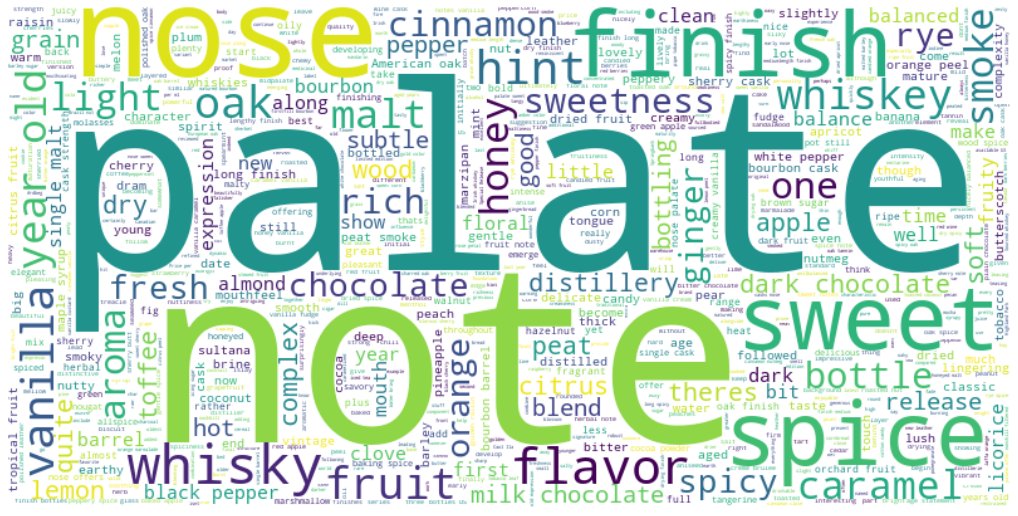

In [17]:
wc = WordCloud(background_color = 'white', max_words = 3000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(whisky_filter['review']))
plt.figure(figsize=(18, 12))
plt.imshow(wc, interpolation='bilinear')

plt.axis("off")
plt.show()

### 